In [1]:
# Necessary library 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import rcParams
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow as tf
%matplotlib inline

2024-02-26 06:02:39.720086: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 06:02:39.720239: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 06:02:39.909502: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv('/kaggle/input/loan-classification/lending_club_loan_two.csv')

In [3]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [7]:
df.isnull()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396026,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396027,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
396028,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [9]:
df['emp_title'].unique()

array(['Marketing', 'Credit analyst ', 'Statistician', ...,
       "Michael's Arts & Crafts", 'licensed bankere',
       'Gracon Services, Inc'], dtype=object)

In [10]:
# Check if any missing values are their in the dataset
def missing_percentage(df):
    """
    Calculate the percentage of missing values for each column in a DataFrame.

    Parameters:
    - df: Pandas DataFrame

    Returns:
    - Pandas Series representing the percentage of missing values for each column
    """
    total_missing = df.isnull().sum()
    total_cells = len(df)
    missing_percentage = (total_missing / total_cells) * 100
    return missing_percentage
missing_percentage(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

<Axes: >

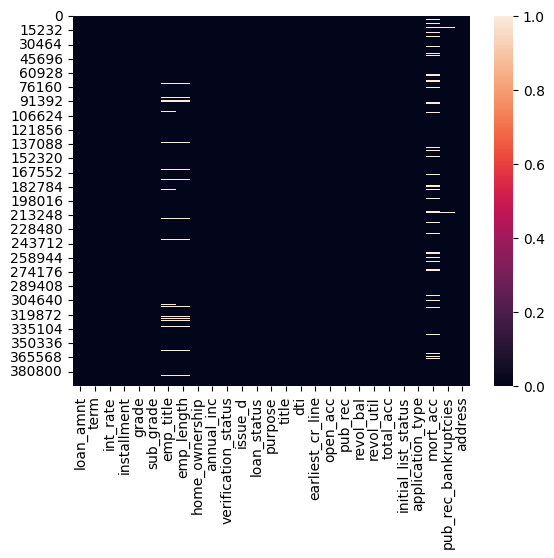

In [11]:
sns.heatmap(df.isnull())

<Axes: xlabel='loan_status', ylabel='count'>

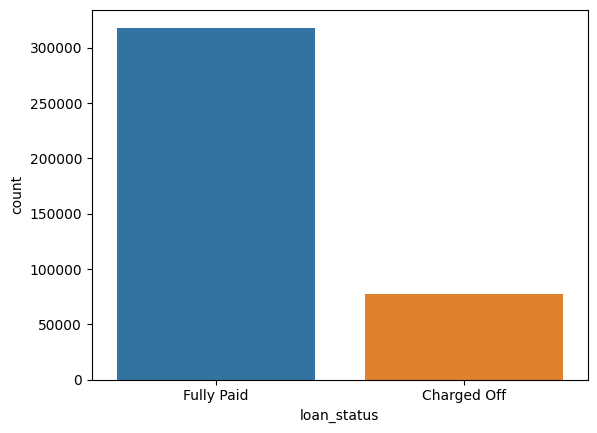

In [12]:
sns.countplot(data=df,x='loan_status')

/tmp/ipykernel_18/3990576511.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['loan_amnt'],bins=45,kde=False)


(0.0, 45000.0)

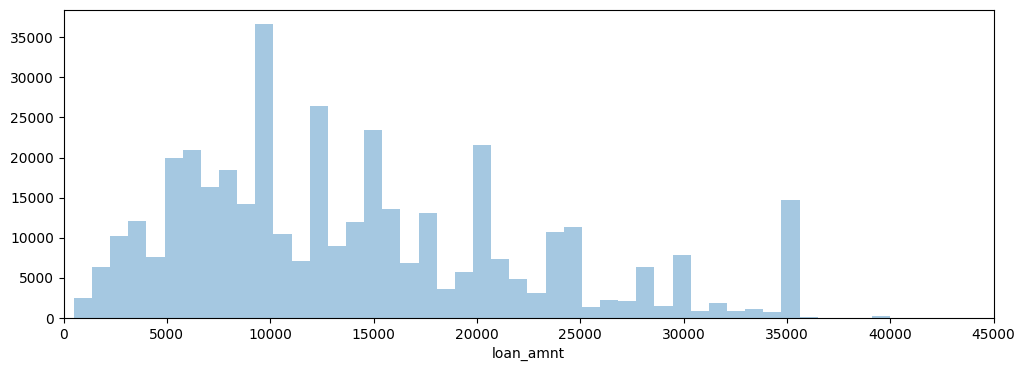

In [13]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],bins=45,kde=False)
plt.xlim(0,45000)

In [14]:
df.corr(numeric_only=True)

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

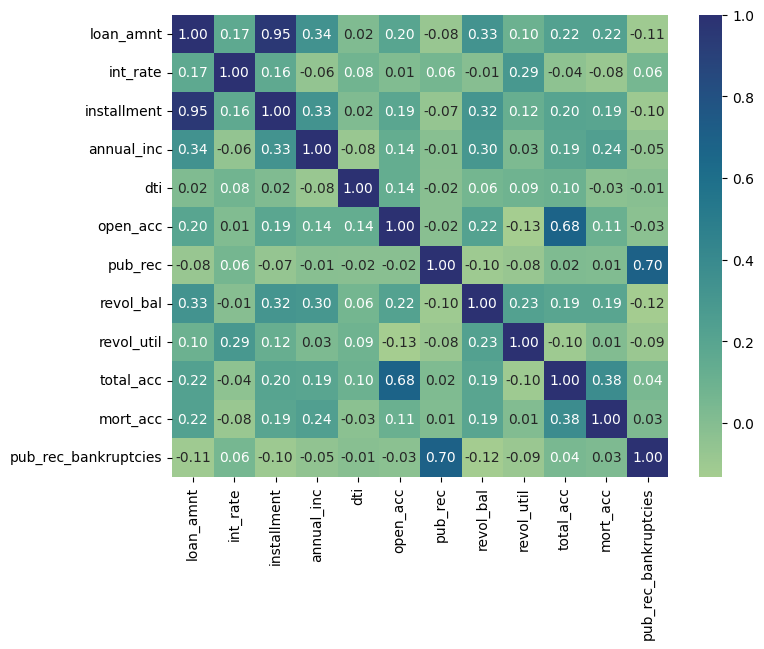

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='crest')

<Axes: xlabel='installment', ylabel='loan_amnt'>

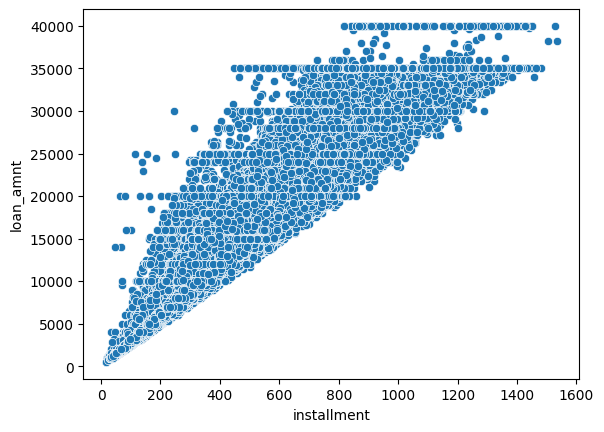

In [16]:
sns.scatterplot(df,x='installment',y='loan_amnt')

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

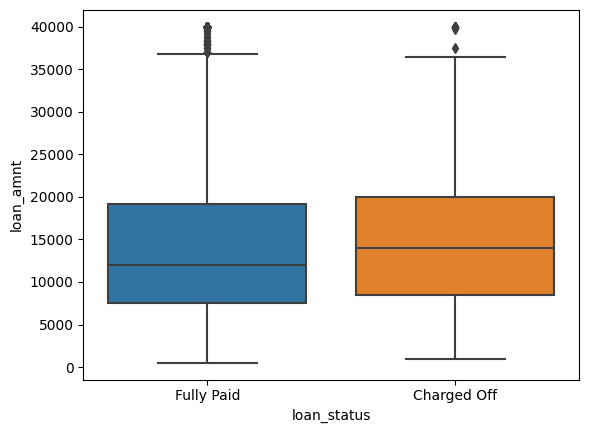

In [17]:
sns.boxplot(df,x='loan_status',y='loan_amnt')

In [18]:
df.groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


<Axes: xlabel='grade', ylabel='count'>

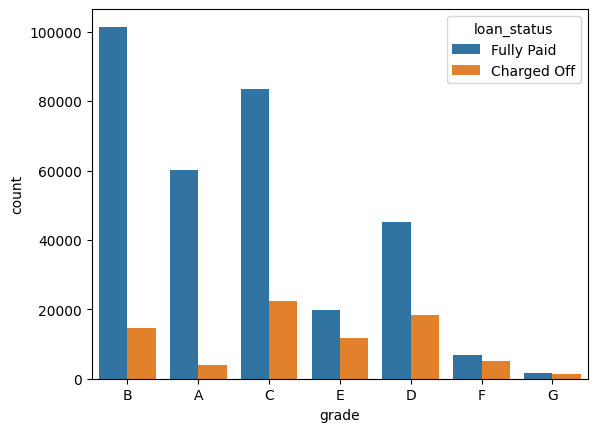

In [19]:
sns.countplot(df,x='grade',hue='loan_status')

In [20]:
np.sort(df['sub_grade'].unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

<Axes: xlabel='sub_grade', ylabel='count'>

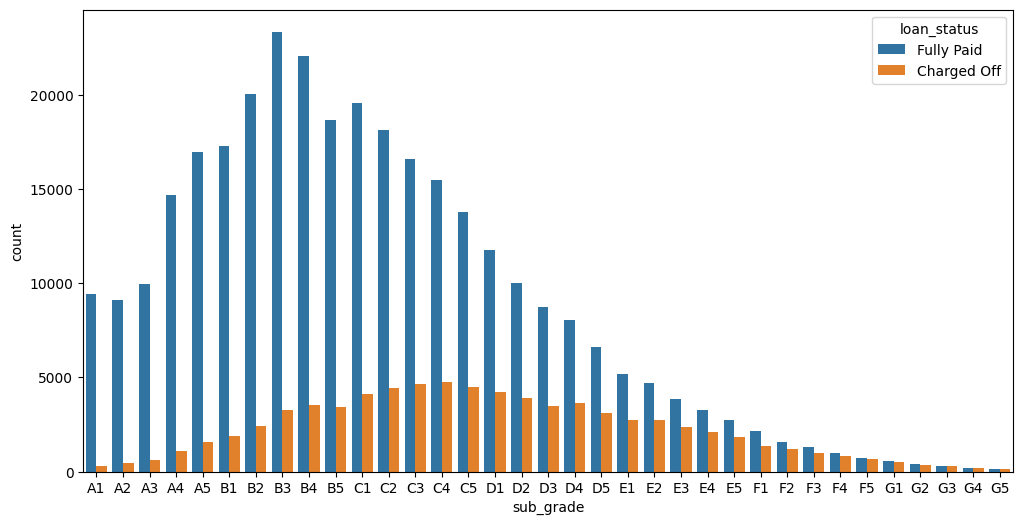

In [21]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='sub_grade',order=np.sort(df['sub_grade'].unique()),hue='loan_status')

In [22]:
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]

<Axes: xlabel='sub_grade', ylabel='count'>

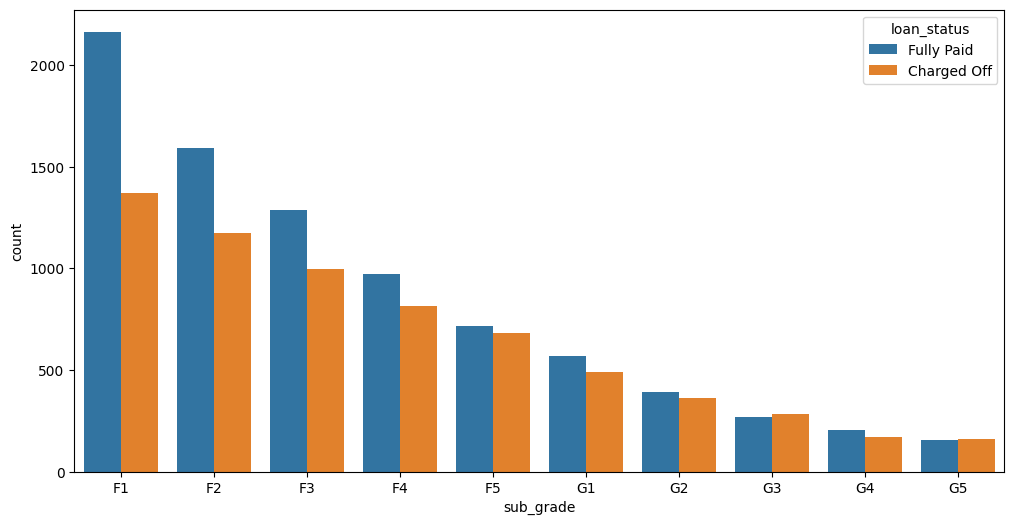

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='sub_grade',order=sorted(f_and_g['sub_grade'].unique()),hue='loan_status')

In [24]:
df['emp_title'].nunique()

173105

In [25]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [26]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 396030, dtype: int64

<Axes: >

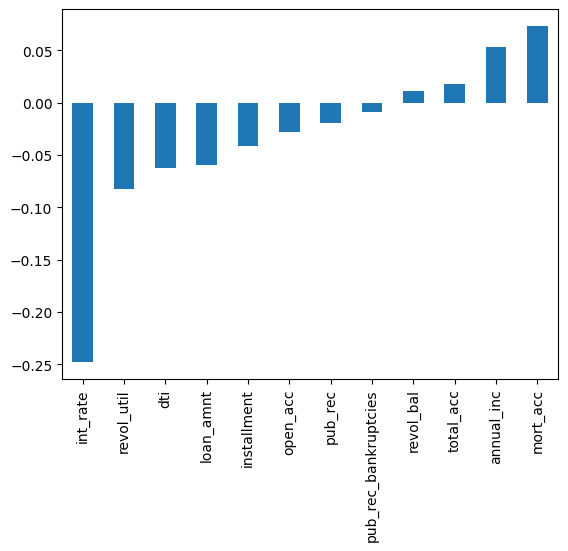

In [27]:
df.corr(numeric_only=True)['loan_repaid'].drop('loan_repaid').sort_values().plot(kind='bar')

In [28]:
df.drop('emp_title',axis=1,inplace=True)

In [29]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [30]:
df['emp_length'].unique()
emp_length_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

<Axes: xlabel='emp_length', ylabel='count'>

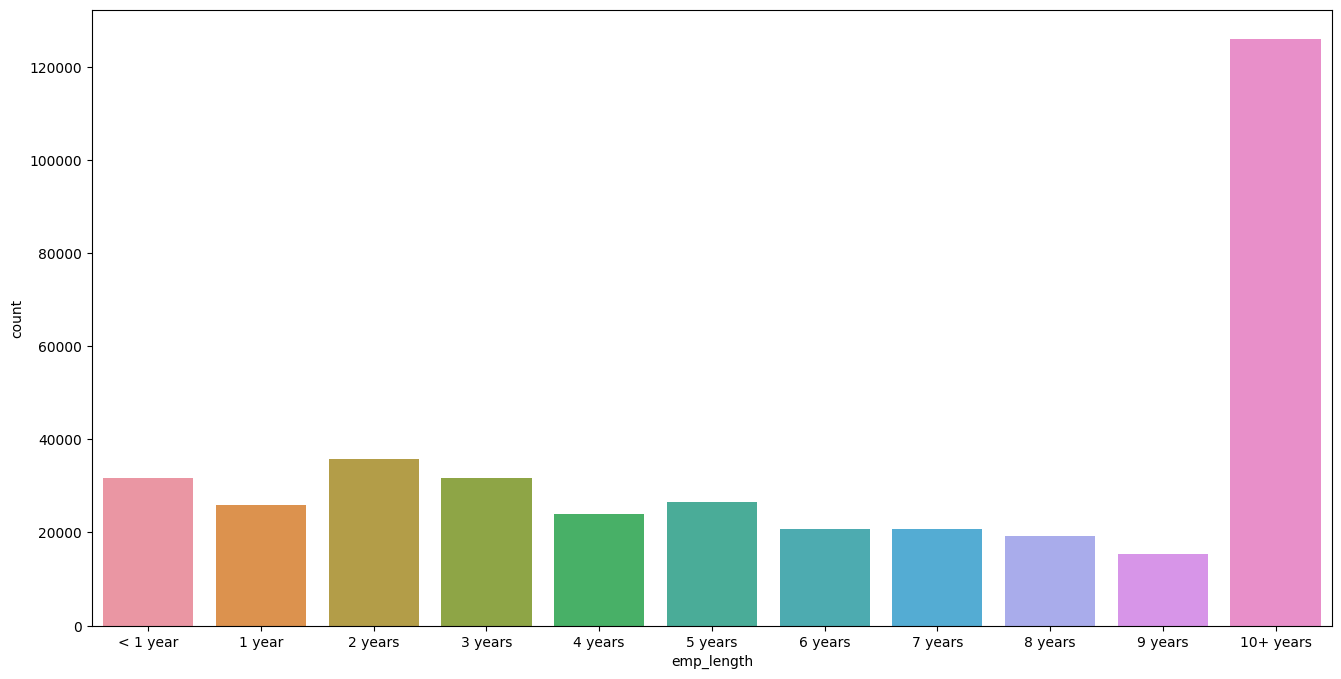

In [31]:
plt.figure(figsize=(16,8))
sns.countplot(df,x='emp_length',order=emp_length_order)

<Axes: xlabel='emp_length', ylabel='count'>

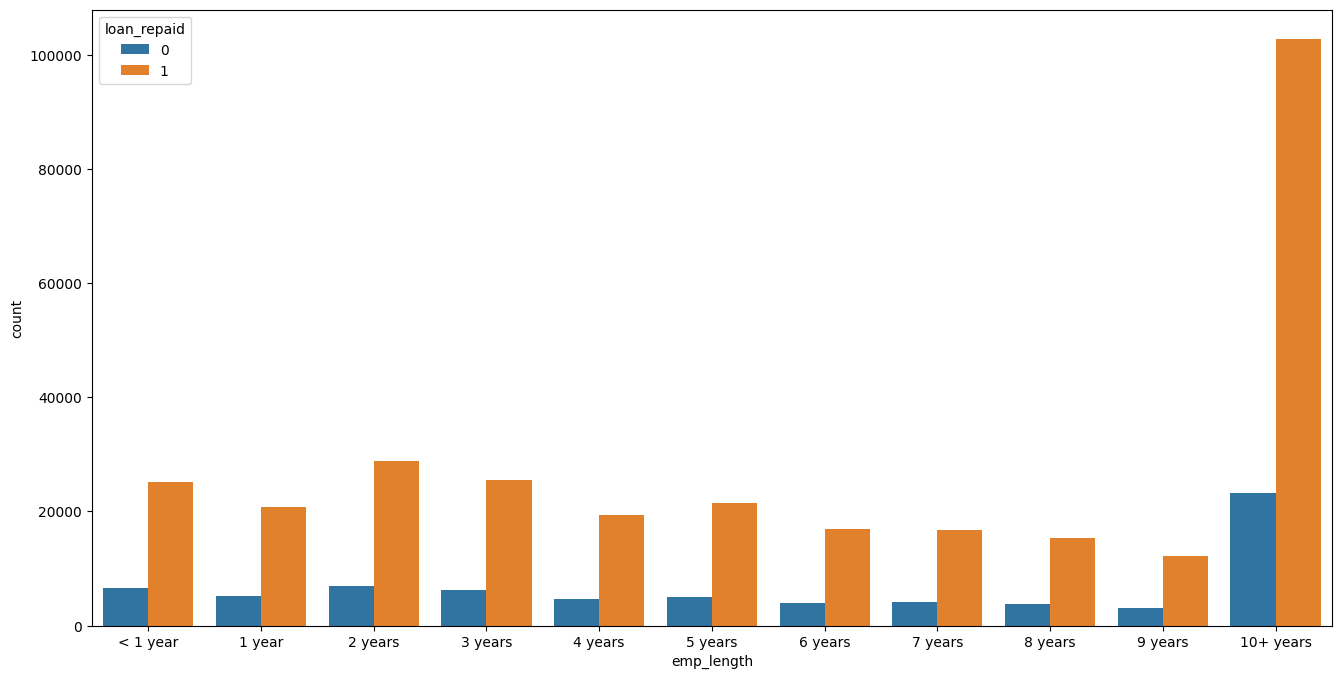

In [32]:
plt.figure(figsize=(16,8))
sns.countplot(df,x='emp_length',order=emp_length_order,hue='loan_repaid')

<Axes: xlabel='emp_length'>

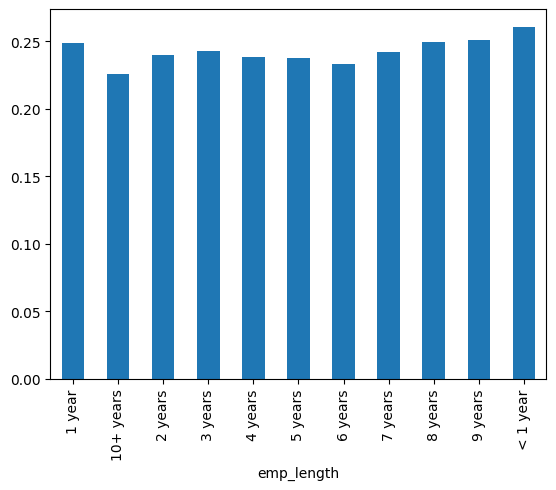

In [33]:
ch_off=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_amnt']
full_paid=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_amnt']
(ch_off/full_paid).plot(kind='bar')

In [34]:
df.drop('loan_status',axis=1,inplace=True)

In [35]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,2 years,RENT,40000.0,Source Verified,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,5 years,MORTGAGE,110000.0,Source Verified,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,10+ years,RENT,56500.0,Verified,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,10+ years,MORTGAGE,64000.0,Verified,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [36]:
df.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
emp_length               True
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
purpose                 False
title                    True
dti                     False
earliest_cr_line        False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
initial_list_status     False
application_type        False
mort_acc                 True
pub_rec_bankruptcies     True
address                 False
loan_repaid             False
dtype: bool

In [37]:
df.drop('emp_length',axis=1,inplace=True)

In [38]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [39]:
df.isnull().any()

loan_amnt               False
term                    False
int_rate                False
installment             False
grade                   False
sub_grade               False
home_ownership          False
annual_inc              False
verification_status     False
issue_d                 False
purpose                 False
title                    True
dti                     False
earliest_cr_line        False
open_acc                False
pub_rec                 False
revol_bal               False
revol_util               True
total_acc               False
initial_list_status     False
application_type        False
mort_acc                 True
pub_rec_bankruptcies     True
address                 False
loan_repaid             False
dtype: bool

In [40]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [41]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [42]:
df.drop('title',axis=1,inplace=True)

In [43]:
df.drop('pub_rec_bankruptcies',axis=1,inplace=True)

In [44]:
df.drop('revol_util',axis=1,inplace=True)

In [45]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,Nov-2004,6.0,0.0,1990.0,23.0,w,INDIVIDUAL,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,Feb-2006,6.0,0.0,43263.0,8.0,f,INDIVIDUAL,1.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,Mar-1997,15.0,0.0,32704.0,23.0,f,INDIVIDUAL,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,Nov-1990,9.0,0.0,15704.0,20.0,f,INDIVIDUAL,5.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [46]:
df.isna().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
purpose                    0
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
total_acc                  0
initial_list_status        0
application_type           0
mort_acc               37795
address                    0
loan_repaid                0
dtype: int64

In [47]:
sorted(df['mort_acc'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 nan,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 30.0,
 31.0,
 32.0,
 34.0]

<Axes: >

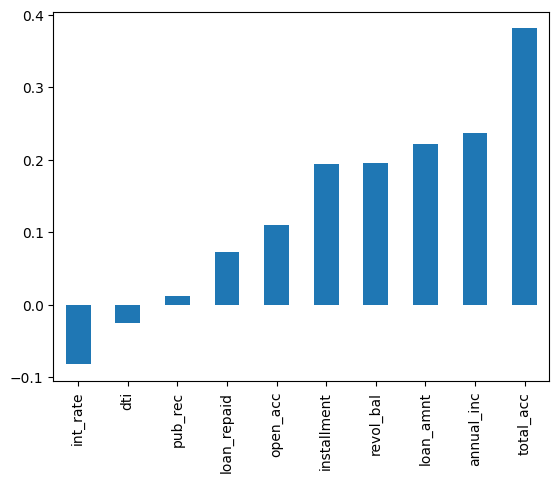

In [48]:
df.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values().plot(kind='bar')

In [49]:
avg_acc=df[['total_acc','mort_acc']].groupby('total_acc').mean().transpose()

In [50]:
avg_acc[2.0]

mort_acc    0.0
Name: 2.0, dtype: float64

In [51]:
df[df['mort_acc'].isna()] [['mort_acc','total_acc']]

,mort_acc,total_acc
22,NaN,7.0
25,NaN,10.0
32,NaN,18.0
41,NaN,16.0
62,NaN,17.0
...,...,...
395991,NaN,21.0
395995,NaN,20.0
396016,NaN,23.0
396021,NaN,50.0


In [52]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return avg_acc[total_acc]
    else:
        return mort_acc

In [53]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [54]:
df.isnull().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [55]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'mort_acc', 'address'],
      dtype='object')

In [56]:
df['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [57]:
df.isna().sum()

loan_amnt              0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
purpose                0
dti                    0
earliest_cr_line       0
open_acc               0
pub_rec                0
revol_bal              0
total_acc              0
initial_list_status    0
application_type       0
mort_acc               0
address                0
loan_repaid            0
dtype: int64

In [58]:
df.select_dtypes(['object']).columns


Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'mort_acc', 'address'],
      dtype='object')

In [59]:
len(df.select_dtypes(['object']).columns)


12

In [60]:
df['term'].value_counts()

term
36 months    302005
60 months     94025
Name: count, dtype: int64

In [61]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,Nov-2004,6.0,0.0,1990.0,23.0,w,INDIVIDUAL,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36 months,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,Feb-2006,6.0,0.0,43263.0,8.0,f,INDIVIDUAL,1.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36 months,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,Mar-1997,15.0,0.0,32704.0,23.0,f,INDIVIDUAL,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60 months,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,Nov-1990,9.0,0.0,15704.0,20.0,f,INDIVIDUAL,5.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [62]:
df['term']=df['term'].str.replace('months','').str.strip().astype(int)

In [63]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,earliest_cr_line,open_acc,pub_rec,revol_bal,total_acc,initial_list_status,application_type,mort_acc,address,loan_repaid
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,Jun-1990,16.0,0.0,36369.0,25.0,w,INDIVIDUAL,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,Jul-2004,17.0,0.0,20131.0,27.0,f,INDIVIDUAL,3.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,Aug-2007,13.0,0.0,11987.0,26.0,f,INDIVIDUAL,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,Sep-2006,6.0,0.0,5472.0,13.0,f,INDIVIDUAL,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,Mar-1999,13.0,0.0,24584.0,43.0,f,INDIVIDUAL,1.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,B4,RENT,40000.0,Source Verified,Oct-2015,...,Nov-2004,6.0,0.0,1990.0,23.0,w,INDIVIDUAL,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723",1
396026,21000.0,36,12.29,700.42,C,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,...,Feb-2006,6.0,0.0,43263.0,8.0,f,INDIVIDUAL,1.0,"0114 Fowler Field Suite 028\r\nRachelborough, ...",1
396027,5000.0,36,9.99,161.32,B,B1,RENT,56500.0,Verified,Oct-2013,...,Mar-1997,15.0,0.0,32704.0,23.0,f,INDIVIDUAL,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7...",1
396028,21000.0,60,15.31,503.02,C,C2,MORTGAGE,64000.0,Verified,Aug-2012,...,Nov-1990,9.0,0.0,15704.0,20.0,f,INDIVIDUAL,5.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL...",1


In [64]:
df.drop('grade',axis=1,inplace=True)

In [65]:
sub_grade_df=pd.get_dummies(df['sub_grade'],drop_first=True,dtype=int)
df=pd.concat([df,sub_grade_df],axis=1)

In [66]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [67]:
verification_status_df=pd.get_dummies(df['verification_status'],drop_first=True,dtype=int)
df=pd.concat([df,verification_status_df],axis=1)

In [68]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,F3,F4,F5,G1,G2,G3,G4,G5,Source Verified,Verified
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,0,0,0,0,1
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,0,0,0,0,1


In [69]:
purpose_df=pd.get_dummies(df['purpose'],drop_first=True,dtype=int)
df=pd.concat([df,purpose_df],axis=1)

In [70]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [71]:
initial_list_status_df=pd.get_dummies(df['initial_list_status'],drop_first=True,dtype=int)
df=pd.concat([df,initial_list_status_df],axis=1)

In [72]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,0,0,1,0,1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,1
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0


In [73]:
application_type_df=pd.get_dummies(df['application_type'],drop_first=True,dtype=int)
df=pd.concat([df,application_type_df],axis=1)

In [74]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,w,INDIVIDUAL,JOINT
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,0,0,0,1,1,0
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,0,0,0,1,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 73 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   sub_grade            396030 non-null  object 
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  object 
 8   issue_d              396030 non-null  object 
 9   purpose              396030 non-null  object 
 10  dti                  396030 non-null  float64
 11  earliest_cr_line     396030 non-null  object 
 12  open_acc             396030 non-null  float64
 13  pub_rec              396030 non-null  float64
 14  revol_bal            396030 non-null  float64
 15  total_acc        

In [76]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [77]:
df['home_ownership']=df['home_ownership'].replace(['ANY','NONE'],'OTHER')

In [78]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [79]:
home_ownership_df=pd.get_dummies(df['home_ownership'],drop_first=True)
df=pd.concat([df,home_ownership_df],axis=1)

In [80]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,renewable_energy,small_business,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,0,1,0,1,1,0,False,False,True
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,0,1,0,False,False,False
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,0,1,0,False,False,True
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,0,1,0,False,False,True
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,0,1,0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,0,1,1,0,False,False,True
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,0,1,0,False,False,False
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,0,1,0,False,False,True
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,0,1,0,False,False,False


In [81]:
df['Zipcode']=df['address'].str[-5:].astype(int)

In [82]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,issue_d,purpose,...,small_business,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT,Zipcode
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,Jan-2015,vacation,...,0,1,0,1,1,0,False,False,True,22690
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,debt_consolidation,...,0,0,0,0,1,0,False,False,False,5113
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,Jan-2015,credit_card,...,0,0,0,0,1,0,False,False,True,5113
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,Nov-2014,credit_card,...,0,0,0,0,1,0,False,False,True,813
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,Apr-2013,credit_card,...,0,0,0,0,1,0,False,False,False,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,Oct-2015,debt_consolidation,...,0,0,0,1,1,0,False,False,True,30723
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,Feb-2015,debt_consolidation,...,0,0,0,0,1,0,False,False,False,5113
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,Oct-2013,debt_consolidation,...,0,0,0,0,1,0,False,False,True,70466
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,Aug-2012,debt_consolidation,...,0,0,0,0,1,0,False,False,False,29597


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 77 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   sub_grade            396030 non-null  object 
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  object 
 8   issue_d              396030 non-null  object 
 9   purpose              396030 non-null  object 
 10  dti                  396030 non-null  float64
 11  earliest_cr_line     396030 non-null  object 
 12  open_acc             396030 non-null  float64
 13  pub_rec              396030 non-null  float64
 14  revol_bal            396030 non-null  float64
 15  total_acc        

In [84]:
df.drop('issue_d',axis=1,inplace=True)

In [85]:
df['Year']=df['earliest_cr_line'].str[-4:].astype(int)

In [86]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT,Zipcode,Year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,1,0,1,1,0,False,False,True,22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,1,0,False,False,False,5113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,1,0,False,False,True,5113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,1,0,False,False,True,813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,1,0,False,False,False,11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,debt_consolidation,15.63,...,0,0,1,1,0,False,False,True,30723,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,debt_consolidation,21.45,...,0,0,0,1,0,False,False,False,5113,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,debt_consolidation,17.56,...,0,0,0,1,0,False,False,True,70466,1997
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,debt_consolidation,15.88,...,0,0,0,1,0,False,False,False,29597,1990


In [87]:
df.drop('address',axis=1,inplace=True)

In [88]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT,Zipcode,Year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,1,0,1,1,0,False,False,True,22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,1,0,False,False,False,5113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,1,0,False,False,True,5113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,1,0,False,False,True,813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,1,0,False,False,False,11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,debt_consolidation,15.63,...,0,0,1,1,0,False,False,True,30723,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,debt_consolidation,21.45,...,0,0,0,1,0,False,False,False,5113,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,debt_consolidation,17.56,...,0,0,0,1,0,False,False,True,70466,1997
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,debt_consolidation,15.88,...,0,0,0,1,0,False,False,False,29597,1990


In [89]:
df.drop('earliest_cr_line',axis=1,inplace=True)

In [90]:
df

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT,Zipcode,Year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,1,0,1,1,0,False,False,True,22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,1,0,False,False,False,5113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,1,0,False,False,True,5113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,1,0,False,False,True,813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,1,0,False,False,False,11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B4,RENT,40000.0,Source Verified,debt_consolidation,15.63,...,0,0,1,1,0,False,False,True,30723,2004
396026,21000.0,36,12.29,700.42,C1,MORTGAGE,110000.0,Source Verified,debt_consolidation,21.45,...,0,0,0,1,0,False,False,False,5113,2006
396027,5000.0,36,9.99,161.32,B1,RENT,56500.0,Verified,debt_consolidation,17.56,...,0,0,0,1,0,False,False,True,70466,1997
396028,21000.0,60,15.31,503.02,C2,MORTGAGE,64000.0,Verified,debt_consolidation,15.88,...,0,0,0,1,0,False,False,False,29597,1990


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 75 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            396030 non-null  float64
 1   term                 396030 non-null  int64  
 2   int_rate             396030 non-null  float64
 3   installment          396030 non-null  float64
 4   sub_grade            396030 non-null  object 
 5   home_ownership       396030 non-null  object 
 6   annual_inc           396030 non-null  float64
 7   verification_status  396030 non-null  object 
 8   purpose              396030 non-null  object 
 9   dti                  396030 non-null  float64
 10  open_acc             396030 non-null  float64
 11  pub_rec              396030 non-null  float64
 12  revol_bal            396030 non-null  float64
 13  total_acc            396030 non-null  float64
 14  initial_list_status  396030 non-null  object 
 15  application_type 

In [92]:
df.select_dtypes(['object']).columns

Index(['sub_grade', 'home_ownership', 'verification_status', 'purpose',
       'initial_list_status', 'application_type', 'mort_acc'],
      dtype='object')

In [93]:
df.drop(['sub_grade','home_ownership','verification_status','purpose','initial_list_status','application_type','mort_acc'],axis=1,inplace=True)

In [94]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,total_acc,...,vacation,wedding,w,INDIVIDUAL,JOINT,OTHER,OWN,RENT,Zipcode,Year
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,25.0,...,1,0,1,1,0,False,False,True,22690,1990
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,27.0,...,0,0,0,1,0,False,False,False,5113,2004
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,26.0,...,0,0,0,1,0,False,False,True,5113,2007
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,13.0,...,0,0,0,1,0,False,False,True,813,2006
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,43.0,...,0,0,0,1,0,False,False,False,11650,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,23.0,...,0,0,1,1,0,False,False,True,30723,2004
396026,21000.0,36,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,8.0,...,0,0,0,1,0,False,False,False,5113,2006
396027,5000.0,36,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,23.0,...,0,0,0,1,0,False,False,True,70466,1997
396028,21000.0,60,15.31,503.02,64000.0,15.88,9.0,0.0,15704.0,20.0,...,0,0,0,1,0,False,False,False,29597,1990


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 68 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_amnt           396030 non-null  float64
 1   term                396030 non-null  int64  
 2   int_rate            396030 non-null  float64
 3   installment         396030 non-null  float64
 4   annual_inc          396030 non-null  float64
 5   dti                 396030 non-null  float64
 6   open_acc            396030 non-null  float64
 7   pub_rec             396030 non-null  float64
 8   revol_bal           396030 non-null  float64
 9   total_acc           396030 non-null  float64
 10  loan_repaid         396030 non-null  int64  
 11  A2                  396030 non-null  int64  
 12  A3                  396030 non-null  int64  
 13  A4                  396030 non-null  int64  
 14  A5                  396030 non-null  int64  
 15  B1                  396030 non-nul

In [96]:
X=df.drop(['loan_repaid'],axis=1)
y=df['loan_repaid']

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
scaler = MinMaxScaler()

In [101]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [102]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [103]:
model = Sequential()

In [104]:
model=Sequential()

model.add(Dense(units=79,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=19,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))


model.compile(optimizer='adam',loss='binary_crossentropy')

model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),epochs=25,batch_size=256,verbose=1)

Epoch 1/25
1238/1238 [==============================] - 7s 5ms/step - loss: 0.4105 - val_loss: 0.3688
Epoch 2/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.3712 - val_loss: 0.3628
Epoch 3/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.3657 - val_loss: 0.3587
Epoch 4/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.3478 - val_loss: 0.3140
Epoch 5/25
1238/1238 [==============================] - 6s 4ms/step - loss: 0.3056 - val_loss: 0.2829
Epoch 6/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.2896 - val_loss: 0.2789
Epoch 7/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.2861 - val_loss: 0.2786
Epoch 8/25
1238/1238 [==============================] - 5s 4ms/step - loss: 0.2846 - val_loss: 0.2783
Epoch 9/25
1238/1238 [==============================] - 6s 5ms/step - loss: 0.2830 - val_loss: 0.2785
Epoch 10/25
1238/1238 [==============================] - 6s 5ms/step - loss: 0.282

<Axes: >

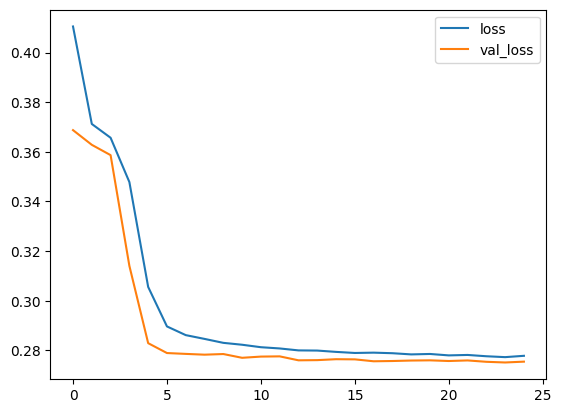

In [105]:
pd.DataFrame(model.history.history).plot()

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

predictions=(model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test,predictions))

2476/2476 [==============================] - 4s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15493
           1       0.88      1.00      0.94     63713

    accuracy                           0.89     79206
   macro avg       0.94      0.72      0.77     79206
weighted avg       0.90      0.89      0.87     79206



In [107]:
model.save

<bound method Model.save of <keras.src.engine.sequential.Sequential object at 0x7ef24783e4a0>>